In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sign-language-mnist/amer_sign2.png
/kaggle/input/sign-language-mnist/amer_sign3.png
/kaggle/input/sign-language-mnist/sign_mnist_train.csv
/kaggle/input/sign-language-mnist/sign_mnist_test.csv
/kaggle/input/sign-language-mnist/american_sign_language.PNG
/kaggle/input/sign-language-mnist/sign_mnist_test/sign_mnist_test.csv
/kaggle/input/sign-language-mnist/sign_mnist_train/sign_mnist_train.csv


In [2]:
train=pd.read_csv('/kaggle/input/sign-language-mnist/sign_mnist_train.csv')
test=pd.read_csv('/kaggle/input/sign-language-mnist/sign_mnist_test.csv')
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [3]:
print(train.shape)
print(test.shape)

(27455, 785)
(7172, 785)


In [4]:
X_train = train.drop('label', axis = 1)
X_test = test.drop('label', axis = 1)
Y_train = train['label']
Y_test = test['label']

In [5]:
X_train.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,107,118,127,134,139,143,146,150,153,156,...,207,207,207,207,206,206,206,204,203,202
1,155,157,156,156,156,157,156,158,158,157,...,69,149,128,87,94,163,175,103,135,149
2,187,188,188,187,187,186,187,188,187,186,...,202,201,200,199,198,199,198,195,194,195
3,211,211,212,212,211,210,211,210,210,211,...,235,234,233,231,230,226,225,222,229,163
4,164,167,170,172,176,179,180,184,185,186,...,92,105,105,108,133,163,157,163,164,179


In [6]:
Y_train.head()

0     3
1     6
2     2
3     2
4    13
Name: label, dtype: int64

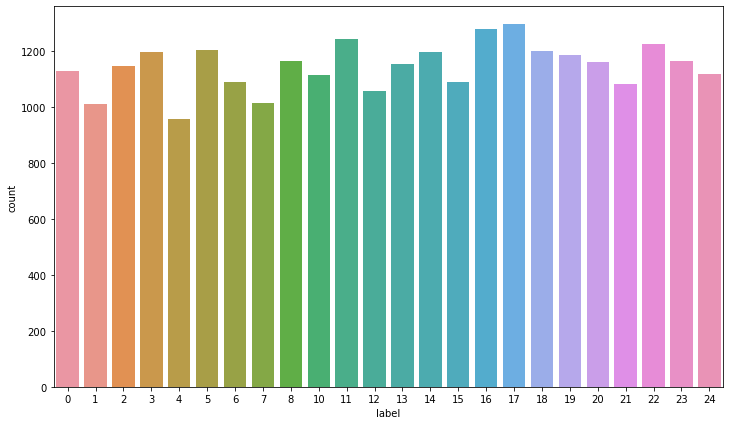

In [7]:
plt.figure(figsize = (12,7))
sns.countplot(x = 'label', data = train)

There are 24 letters, with J(9) and Z(25) being excluded. They seem to be equally distributed

In [8]:
images_train = X_train.values
images_train = images_train.reshape(-1, 28,28,1)
images_train.shape

(27455, 28, 28, 1)

In [9]:
images_test = X_test.values
images_test = images_test.reshape(-1,28,28,1)
images_test.shape

(7172, 28, 28, 1)

In [10]:
images_train.mean()

159.2910081989452

In [11]:
images_train = images_train / 255
images_test = images_test / 255

In [12]:
images_train.mean()

0.6246706203880206

Text(0.5, 1.0, 'label: 13  letter: M')

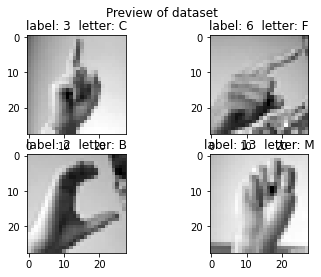

In [13]:
fig,axe=plt.subplots(2,2)
fig.suptitle('Preview of dataset')
axe[0,0].imshow(images_train[0].reshape(28,28),cmap='gray')
axe[0,0].set_title('label: 3  letter: C')
axe[0,1].imshow(images_train[1].reshape(28,28),cmap='gray')
axe[0,1].set_title('label: 6  letter: F')
axe[1,0].imshow(images_train[2].reshape(28,28),cmap='gray')
axe[1,0].set_title('label: 2  letter: B')
axe[1,1].imshow(images_train[4].reshape(28,28),cmap='gray')
axe[1,1].set_title('label: 13  letter: M')

In [14]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
Y_train = lb.fit_transform(Y_train)
Y_test = lb.fit_transform(Y_test)

In [15]:
print(Y_train.shape)
print(Y_test.shape)

(27455, 24)
(7172, 24)


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
images_train, images_val, Y_train, Y_val = train_test_split(images_train, Y_train, test_size = 0.07, random_state = 5)


In [18]:
print(images_train.shape)
print(images_val.shape)

(25533, 28, 28, 1)
(1922, 28, 28, 1)


In [19]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import ReLU

In [20]:
conv_model = Sequential()
conv_model.add(Conv2D(filters = 32, kernel_size = (3,3), padding = 'same', input_shape = (28,28,1), activation = 'relu'))
conv_model.add(MaxPooling2D(pool_size = (2,2)))
conv_model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'same', activation='relu'))
conv_model.add(MaxPooling2D(pool_size = (2,2)))
conv_model.add(Flatten())
conv_model.add(Dense(units = 256, activation='relu', kernel_regularizer='l2'))
conv_model.add(Dropout(0.2))
conv_model.add(Dense(units = 24, activation='softmax'))




In [21]:
conv_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               803072    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0

In [22]:
conv_model.compile(optimizer = Adam(), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [23]:
conv_model.fit(images_train, Y_train, epochs = 10, validation_data = (images_val, Y_val), verbose = 2)

Epoch 1/10
798/798 - 3s - loss: 1.5790 - accuracy: 0.6391 - val_loss: 0.6122 - val_accuracy: 0.9422
Epoch 2/10
798/798 - 2s - loss: 0.5850 - accuracy: 0.9088 - val_loss: 0.3653 - val_accuracy: 0.9875
Epoch 3/10
798/798 - 2s - loss: 0.4053 - accuracy: 0.9522 - val_loss: 0.3042 - val_accuracy: 0.9828
Epoch 4/10
798/798 - 2s - loss: 0.3329 - accuracy: 0.9657 - val_loss: 0.2800 - val_accuracy: 0.9813
Epoch 5/10
798/798 - 3s - loss: 0.3059 - accuracy: 0.9709 - val_loss: 0.2151 - val_accuracy: 0.9964
Epoch 6/10
798/798 - 3s - loss: 0.2847 - accuracy: 0.9743 - val_loss: 0.2444 - val_accuracy: 0.9906
Epoch 7/10
798/798 - 2s - loss: 0.2685 - accuracy: 0.9770 - val_loss: 0.2090 - val_accuracy: 1.0000
Epoch 8/10
798/798 - 2s - loss: 0.2481 - accuracy: 0.9805 - val_loss: 0.1907 - val_accuracy: 0.9995
Epoch 9/10
798/798 - 2s - loss: 0.2364 - accuracy: 0.9807 - val_loss: 0.1863 - val_accuracy: 0.9948
Epoch 10/10
798/798 - 2s - loss: 0.2244 - accuracy: 0.9828 - val_loss: 0.1877 - val_accuracy: 0.9932

In [24]:
ls,acc = conv_model.evaluate(images_test, Y_test)

225/225 [==============================] - 1s 2ms/step - loss: 0.5215 - accuracy: 0.8919


In [25]:
print('Test set loss:'+str(ls)[0:6])
print('Test set accuracy:'+str(acc)[0:6])

Test set loss:0.5214
Test set accuracy:0.8919


This model gives 89% accuracy on the test set. Let's see if we can get a better accuracy from a deeper model

In [26]:
conv_deep_model = Sequential()
conv_deep_model.add(Conv2D(filters = 32, kernel_size = (3,3), padding = 'same'))
conv_deep_model.add(BatchNormalization())
conv_deep_model.add(ReLU())
conv_deep_model.add(MaxPooling2D(pool_size = (2,2)))

conv_deep_model.add(Conv2D(filters = 64, kernel_size = (5,5), padding = 'same'))
conv_deep_model.add(BatchNormalization())
conv_deep_model.add(ReLU())
conv_deep_model.add(MaxPooling2D(pool_size = (2,2)))

conv_deep_model.add(Conv2D(filters = 32, kernel_size = (3,3), padding = 'same'))
conv_deep_model.add(BatchNormalization())
conv_deep_model.add(ReLU())
conv_deep_model.add(AveragePooling2D(pool_size = (2,2)))

conv_deep_model.add(Flatten())
conv_deep_model.add(Dense(units = 256, activation = 'relu', kernel_regularizer = 'l2'))
conv_deep_model.add(Dropout(0.2))
conv_deep_model.add(Dense(units = 24, activation = 'softmax'))

In [27]:
conv_deep_model.compile(optimizer = Adam(), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [28]:
conv_deep_model.fit(images_train, Y_train, epochs = 15, validation_data = (images_val, Y_val), verbose = 2)

Epoch 1/15
798/798 - 3s - loss: 0.9762 - accuracy: 0.8954 - val_loss: 0.2702 - val_accuracy: 0.9781
Epoch 2/15
798/798 - 3s - loss: 0.1103 - accuracy: 0.9981 - val_loss: 0.0765 - val_accuracy: 0.9979
Epoch 3/15
798/798 - 3s - loss: 0.0975 - accuracy: 0.9941 - val_loss: 0.8542 - val_accuracy: 0.7268
Epoch 4/15
798/798 - 3s - loss: 0.0770 - accuracy: 0.9954 - val_loss: 0.0600 - val_accuracy: 0.9990
Epoch 5/15
798/798 - 3s - loss: 0.0773 - accuracy: 0.9955 - val_loss: 0.0286 - val_accuracy: 1.0000
Epoch 6/15
798/798 - 3s - loss: 0.0714 - accuracy: 0.9951 - val_loss: 0.1039 - val_accuracy: 0.9943
Epoch 7/15
798/798 - 3s - loss: 0.0536 - accuracy: 0.9962 - val_loss: 0.5524 - val_accuracy: 0.8892
Epoch 8/15
798/798 - 3s - loss: 0.0501 - accuracy: 0.9991 - val_loss: 0.0158 - val_accuracy: 1.0000
Epoch 9/15
798/798 - 3s - loss: 0.0154 - accuracy: 0.9998 - val_loss: 0.4689 - val_accuracy: 0.8590
Epoch 10/15
798/798 - 3s - loss: 0.0738 - accuracy: 0.9952 - val_loss: 0.0126 - val_accuracy: 1.0000

In [29]:
ls,acc = conv_deep_model.evaluate(images_test, Y_test)

225/225 [==============================] - 1s 2ms/step - loss: 0.1085 - accuracy: 0.9770


In [30]:
print('Test set loss:'+str(ls)[0:6])
print('Test set accuracy:'+str(acc)[0:6])

Test set loss:0.1084
Test set accuracy:0.9769


This is giving us 97.6% accuracy on the test set!